# Modelling 1
# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('automobile2.csv', header=None)

headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
'body-style','drive-wheels','engine-location','wheel-base','length','width','height','curp-weight',
'engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ration',
'horsepower','peak-rpm','city-mpg','highway-mpg','price']

df.columns = headers

df.dropna(axis=0, inplace=True)
print(df.dtypes)
df.head()



symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curp-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ration    float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


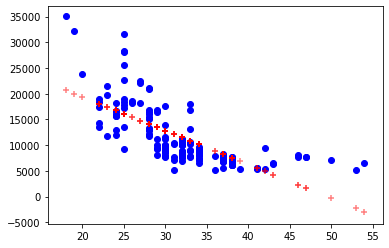

1.Using highway mpg as X, MSE =  16529789.914714003
1.Using highway mpg as X, RMSE =  4065.6844337348666


In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']

reg.fit(X,Y)
Yp = reg.predict(X)

plt.figure()
plt.scatter(X['highway-mpg'],Y, color='blue', marker='o')
plt.scatter(X['highway-mpg'],Yp, color='red', marker='+', alpha=0.5)
plt.show()

mse = mean_squared_error(Y,Yp)
print('1.Using highway mpg as X, MSE = ',str(mse))
print('1.Using highway mpg as X, RMSE = ',str(np.sqrt(mse)))

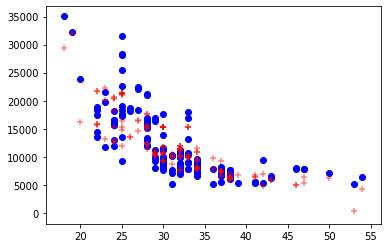

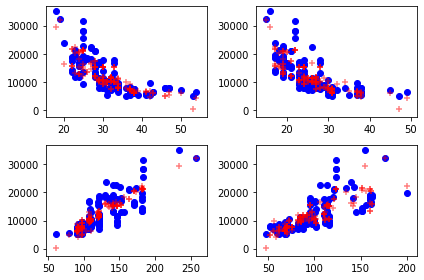

1.Using 4 attributes as X, MSE =  8864871.342975475
1.Using 4 attributes as X, RMSE =  2977.3933806226337


In [3]:
reg = LinearRegression()
att = ['highway-mpg','city-mpg', 'engine-size', 'horsepower']
X = df[['highway-mpg','city-mpg', 'engine-size', 'horsepower']]
Y = df['price']

reg.fit(X,Y)
Yp = reg.predict(X)

plt.figure()
plt.scatter(X['highway-mpg'],Y, color='blue', marker='o')
plt.scatter(X['highway-mpg'],Yp, color='red', marker='+', alpha=0.5)
plt.show()

nr, nc = 2, 2
fig, axs = plt.subplots(nr,nc, tight_layout=True)
for i in range(0,len(att)):
    x = int(i / nr)
    y = i % nr
    col = att[i]
    axs[x,y].scatter(X[col],Y, color='blue', marker='o')
    axs[x,y].scatter(X[col],Yp, color='red', marker='+', alpha=0.5)
plt.show()


mse = mean_squared_error(Y,Yp)
print('1.Using 4 attributes as X, MSE = ',str(mse))
print('1.Using 4 attributes as X, RMSE = ',str(np.sqrt(mse)))

In [4]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

att = ['highway-mpg','city-mpg', 'engine-size', 'horsepower']
X = df[['highway-mpg','city-mpg', 'engine-size', 'horsepower']]
Y = df['price']

modelnames = ['Multiple Linear Regression','SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
models = [LinearRegression(), SVR(kernel='linear'), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=25, max_depth=50)]
rmse = [0,0,0,0]
mse = [0,0,0,0]
r2s = [0,0,0,0]

for i in range(0,len(models)):
    models[i].fit(X,Y)
    Yp = models[i].predict(X)
    mse[i] = mean_squared_error(Y,Yp)
    rmse[i] = np.sqrt(mse[i])
    r2s[i]  = r2_score(Y,Yp)
    
print(modelnames)
print(mse)
print(rmse)
print(r2s)




['Multiple Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
[8864871.342975475, 9482022.561618552, 863655.6512928022, 1275976.527119861]
[2977.3933806226337, 3079.2892948890903, 929.3307545178961, 1129.5913097752925]
[0.7417891061308053, 0.7238130789948262, 0.9748439329700813, 0.9628340867140951]


(0, 37236.25992248771)

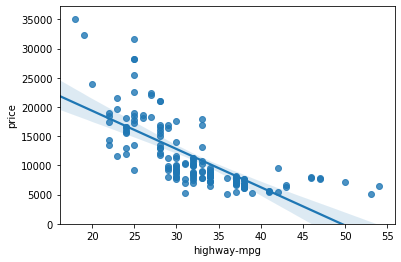

In [5]:
import seaborn as sns

sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)


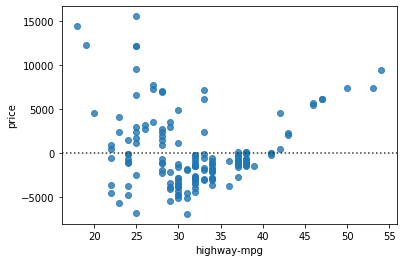

In [6]:
sns.residplot(df['highway-mpg'], df['price'])

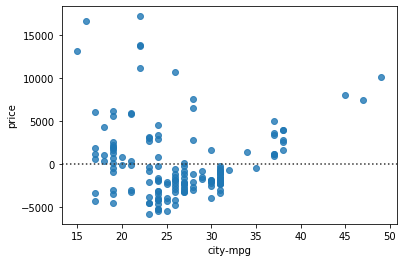

In [7]:
sns.residplot(df['city-mpg'], df['price'])

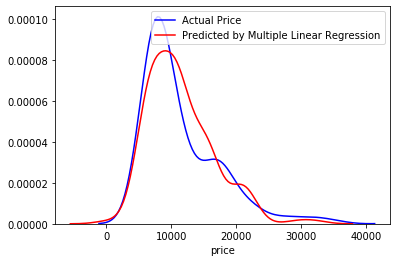

In [8]:
colors = ['r','yellowgreen','gold','magenta']
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Price')
sns.distplot(models[0].predict(X), hist=False, color=colors[0], label='Predicted by '+modelnames[0], ax=ax1)

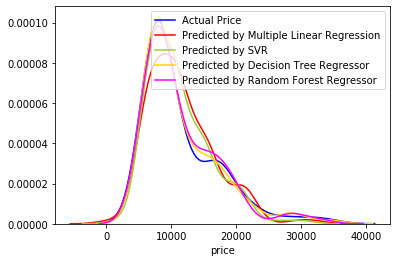

In [9]:
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Price')
colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    sns.distplot(models[i].predict(X), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=3)), ('model', LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X,Y)
Yp = pipe.predict(X)

mse = mean_squared_error(Y,Yp)
print('1.Using 4 attributes as X, MSE = ',str(mse))
print('1.Using 4 attributes as X, RMSE = ',str(np.sqrt(mse)))
print('1.Using 4 attributes as X, R2 = ',str(r2_score(Y,Yp)))

print(modelnames)
print(mse)
print(rmse)
print(r2s)

1.Using 4 attributes as X, MSE =  2583461.1166302506
1.Using 4 attributes as X, RMSE =  1607.3148778724878
1.Using 4 attributes as X, R2 =  0.9247504246375784
['Multiple Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
2583461.1166302506
[2977.3933806226337, 3079.2892948890903, 929.3307545178961, 1129.5913097752925]
[0.7417891061308053, 0.7238130789948262, 0.9748439329700813, 0.9628340867140951]


In [31]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = datasets.load_iris()
#print(data.data)
#print(data.target)
print(data.target_names)
print(data.feature_names)

models = [GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
modelnames = ['N.Bayes', 'SVM', 'Tree','KNN']

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.30, random_state=42)

for i in range(0,len(models)):
    print('------------------------------------------------------------------------------')
    print("Train and Test model ", modelnames[i])
    
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print('------------------------------------------------------------------------------')


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
------------------------------------------------------------------------------
Train and Test model  N.Bayes
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

------------------------------------------------------------------------------
------------------------------------------------------------------------------
Train and Test model  SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00 

/home/anwar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = datasets.load_wine()
#print(data.data)
#print(data.target)
print(data.target_names)
print(data.feature_names)

models = [GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
modelnames = ['N.Bayes', 'SVM', 'Tree','KNN']

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.30, random_state=42)

for i in range(0,len(models)):
    print('------------------------------------------------------------------------------')
    print("Train and Test model ", modelnames[i])
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print('------------------------------------------------------------------------------')


['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
------------------------------------------------------------------------------
Train and Test model  N.Bayes
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

------------------------------------------------------------------------------
------------------------------------------------------------------------------
Train and Test model  SVM
[[ 1 18  0]
 [ 0 21  0]
 [ 0 13  1]]
          

/home/anwar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


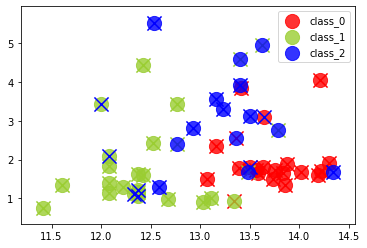

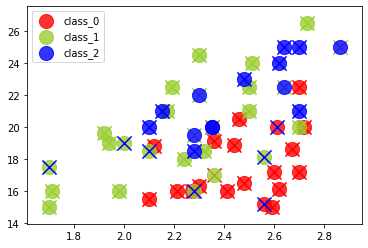

In [50]:
y_proba = models[i].predict_proba(X_test)
#print(y_pred)
#print(y_proba)
colors = ['red','yellowgreen','blue','gold','magenta']

plt.figure()
for i in range(0,len(data.target_names)):
    label = data.target_names[i]
    plt.scatter(X_test[y_test==i,0],X_test[y_test==i,1],label=label, alpha=0.8, s=200, color=colors[i])
    plt.scatter(X_test[y_pred==i,0],X_test[y_pred==i,1], marker='x', s=200, color=colors[i])
plt.legend()
plt.show()


plt.figure()
for i in range(0,len(data.target_names)):
    label = data.target_names[i]
    plt.scatter(X_test[y_test==i,2],X_test[y_test==i,3],label=label, alpha=0.8, s=200, color=colors[i])
    plt.scatter(X_test[y_pred==i,2],X_test[y_pred==i,3], marker='x', s=200, color=colors[i])
plt.legend()
plt.show()

[2 0 0 1 0 1 2 0 0 2 1 1 1 2 1 1 0 2 0 1 2 2 1 2 0 0 1 0 1 1 0 1 0 0 0 2 0
 2 0 0 0 2 2 1 0 0 2 0 1 1 0 2 2 1 1 0 0 0 1 1 2 1 2 1 1 0 0 1 2 1 2 2 0 2
 2 0 2 2 2 0 1 1 0 1 2 1 1 2 0 2 2 0 1 0 1 2 1 1 0 2 1 1 2 1 2 1 1 1 2 0 0
 0 2 0 0 0 0 2 1 1 0 1 0 0]


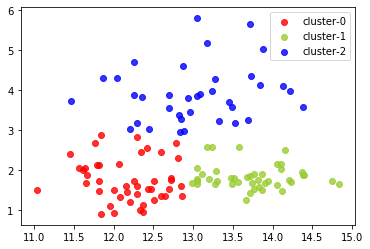

[ 0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


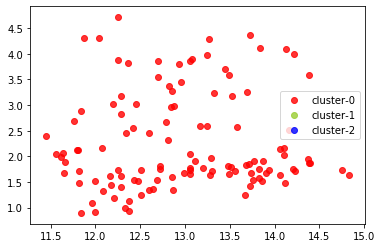

In [62]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

model = KMeans(n_clusters=3, random_state=0)
model.fit(X_train[:,0:2])
ycl = model.predict(X_train[:,0:2])
print(ycl)
plt.figure()
for i in range(0,3):
    label = data.target_names[i]
    plt.scatter(X_train[ycl==i,0],X_train[ycl==i,1],label='cluster-'+str(i), alpha=0.8, color=colors[i])
plt.legend()
plt.show()

model = DBSCAN(min_samples=2)
model.fit(X_train)
ycl = model.fit_predict(X_train[:,0:2])
print(ycl)
plt.figure()
for i in range(0,3):
    label = data.target_names[i]
    plt.scatter(X_train[ycl==i,0],X_train[ycl==i,1],label='cluster-'+str(i), alpha=0.8, color=colors[i])
plt.legend()
plt.show()